In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import audioflux as af
from scipy.io import wavfile
import sounddevice as sd
import librosa
import librosa.display
from sklearn.model_selection import train_test_split
import cv2
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics



In [2]:
savee = os.listdir('savee_dataset')
crema_d = os.listdir('crema_d_dataset')
ravdess = os.listdir('ravdess_dataset')
tess = os.listdir('TESS')

In [3]:
emotion = []
for wav in savee:
    w = wav.split('_')[1]
    if w[0:2] == 'sa':
        emotion.append('male_sad')
    elif w[0] == 'n':
        emotion.append('male_neutral')
    elif w[0:2] == 'su':
        emotion.append('male_surprised')
    elif w[0] == 'f':
        emotion.append('male_fear')
    elif w[0] == 'd':
        emotion.append('male_disgust')
    elif w[0] == 'h':
        emotion.append('male_happy')
    elif w[0] =='a':
        emotion.append('male_anger')
print(len(emotion))

480


In [4]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(savee, columns=['Path'])
savee_df = pd.concat([emotion_df, path_df], axis = 1)
savee_df['folder'] = 'savee_dataset/'
savee_df.head(10)

,Emotions,Path,folder
0,male_sad,JK_sa01.wav,savee_dataset/
1,male_sad,JK_sa15.wav,savee_dataset/
2,male_neutral,DC_n13.wav,savee_dataset/
3,male_surprised,DC_su09.wav,savee_dataset/
4,male_neutral,DC_n07.wav,savee_dataset/
5,male_neutral,JK_n20.wav,savee_dataset/
6,male_neutral,JK_n08.wav,savee_dataset/
7,male_sad,JE_sa08.wav,savee_dataset/
8,male_fear,JK_f15.wav,savee_dataset/
9,male_fear,JK_f01.wav,savee_dataset/


In [7]:
tess.remove('.DS_Store')

In [8]:
emotion=[]
tess_wavs=[]
for folder in tess:
    fname=os.listdir('TESS/' + folder)
    for files in fname:
        tess_wavs.append(f'{folder}/{files}')
        if folder == 'OAF_Sad' or folder == 'YAF_sad':
            emotion.append('female_sad')
        elif folder == 'OAF_neutral' or folder == 'YAF_neutral':
            emotion.append('female_neutral')
        elif folder == 'OAF_Pleasant_surprise' or folder == 'YAF_pleasant_surprised':
            emotion.append('female_surprised')
        elif folder == 'OAF_Fear' or folder == 'YAF_fear':
            emotion.append('female_fear')
        elif folder == 'OAF_disgust' or folder == 'YAF_disgust':
            emotion.append('female_disgust')
        elif folder == 'OAF_happy' or folder == 'YAF_happy':
            emotion.append('female_happy')
        elif folder =='OAF_angry' or folder == 'YAF_angry':
            emotion.append('female_anger')

In [9]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(tess_wavs, columns=['Path'])
tess_df = pd.concat([emotion_df, path_df], axis = 1)
tess_df['folder'] = 'TESS/'

In [10]:
emotion = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,
          1046,1047,1049,1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,
          1084,1089,1091]
for wav in crema_d:
    w = wav.split('_')
    if int(w[0]) in female:
        if w[2] == 'SAD':
            emotion.append('female_sad')
        elif w[2] == 'NEU':
            emotion.append('female_neutral')
        elif w[2] == 'SUR':
            emotion.append('female_surprised')
        elif w[2] == 'FEA':
            emotion.append('female_fear')
        elif w[2] == 'DIS':
            emotion.append('female_disgust')
        elif w[2] == 'HAP':
            emotion.append('female_happy')
        elif w[2] =='ANG':
            emotion.append('female_anger')
    else:
        if w[2] == 'SAD':
            emotion.append('male_sad')
        elif w[2] == 'NEU':
            emotion.append('male_neutral')
        elif w[2] == 'SUR':
            emotion.append('male_surprised')
        elif w[2] == 'FEA':
            emotion.append('male_fear')
        elif w[2] == 'DIS':
            emotion.append('male_disgust')
        elif w[2] == 'HAP':
            emotion.append('male_happy')
        elif w[2] =='ANG':
            emotion.append('male_anger')
print(len(emotion))

7442


In [11]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(crema_d, columns=['Path'])
crema_d_df = pd.concat([emotion_df, path_df], axis = 1)
crema_d_df['folder'] = 'crema_d_dataset/'

In [12]:
crema_d_df['Emotions'].value_counts()

Emotions
male_anger        671
male_disgust      671
male_sad          671
male_happy        671
male_fear         671
female_anger      600
female_disgust    600
female_sad        600
female_fear       600
female_happy      600
male_neutral      575
female_neutral    512
Name: count, dtype: int64

In [13]:
ravdess.remove('.DS_Store')

In [14]:
emotion = []
ravdess_wavs = []
for actor in ravdess:
    wavs = os.listdir(f'ravdess_dataset/{actor}')
    for wav in wavs:
        ravdess_wavs.append(f'{actor}/{wav}')
        if int(wav[18:20])%2==0:
            if wav[7:8] == '4':
                emotion.append('female_sad')
            elif wav[7:8] == '1':
                emotion.append('female_neutral')
            elif wav[7:8] == '8':
                emotion.append('female_surprised')
            elif wav[7:8] == '6':
                emotion.append('female_fear')
            elif wav[7:8] == '7':
                emotion.append('female_disgust')
            elif wav[7:8] == '3':
                emotion.append('female_happy')
            elif wav[7:8] =='5':
                emotion.append('female_anger')
            elif wav[7:8] =='2':
                emotion.append('female_neutral')
        else:
            if wav[7:8] == '4':
                emotion.append('male_sad')
            elif wav[7:8] == '1':
                emotion.append('male_neutral')
            elif wav[7:8] == '8':
                emotion.append('male_surprised')
            elif wav[7:8] == '6':
                emotion.append('male_fear')
            elif wav[7:8] == '7':
                emotion.append('male_disgust')
            elif wav[7:8] == '3':
                emotion.append('male_happy')
            elif wav[7:8] =='5':
                emotion.append('male_anger')
            elif wav[7:8] =='2':
                emotion.append('male_neutral')
        
print(len(emotion))

1440


In [15]:
emotion_df = pd.DataFrame(emotion, columns=['Emotions'])
path_df = pd.DataFrame(ravdess_wavs, columns=['Path'])
ravdess_df = pd.concat([emotion_df, path_df], axis = 1)
ravdess_df['folder'] = 'ravdess_dataset/'

In [16]:
ravdess_df = ravdess_df[ravdess_df['Emotions'] != 'disgust']
#ravdess_df = ravdess_df[ravdess_df['Emotions'] != 'surprised']
ravdess_df = ravdess_df.reset_index(drop=True)

In [21]:
#data = pd.concat([savee_df, tess_df, ravdess_df, crema_d_df], axis=0)
data=ravdess_df
data = data.reset_index(drop=True)

In [22]:
data.head()

,Emotions,Path,folder
0,female_anger,Actor_16/03-01-05-01-02-01-16.wav,ravdess_dataset/
1,female_fear,Actor_16/03-01-06-01-02-02-16.wav,ravdess_dataset/
2,female_fear,Actor_16/03-01-06-02-01-02-16.wav,ravdess_dataset/
3,female_anger,Actor_16/03-01-05-02-01-01-16.wav,ravdess_dataset/
4,female_disgust,Actor_16/03-01-07-01-01-01-16.wav,ravdess_dataset/


In [23]:
data['Emotions'].value_counts()

Emotions
female_neutral      144
male_neutral        144
female_anger         96
female_fear          96
female_disgust       96
female_sad           96
female_surprised     96
female_happy         96
male_happy           96
male_sad             96
male_disgust         96
male_fear            96
male_anger           96
male_surprised       96
Name: count, dtype: int64

In [24]:
data = data[data['Emotions'] != 'female_disgust']
data = data[data['Emotions'] != 'male_disgust']
data = data[data['Emotions'] != 'female_surprised']
data = data[data['Emotions'] != 'male_surprised']
data = data.reset_index(drop=True)

In [25]:
from sklearn.utils import shuffle

data = shuffle(data).reset_index(drop=True)

In [26]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def pitch(data):
    return librosa.effects.pitch_shift(data, sr=22050, n_steps=0.7)

In [30]:
def zcr(data):
    zcr=librosa.feature.zero_crossing_rate(data)
    return np.squeeze(zcr)

def rmse(data):
    rmse=librosa.feature.rms(y=data)
    return np.squeeze(rmse)

def mfcc(data, flatten:bool=True):
    mfcc = librosa.feature.mfcc(y=data)
    return np.squeeze(mfcc.T) if not flatten else np.ravel(mfcc.T)

def extract_features(data):
    result=np.array([])
    result=np.hstack((result, zcr(data), rmse(data), mfcc(data)))
    return result

def get_features(path):
    data,sr=librosa.load(path)
    #data = librosa.util.fix_length(data, size=500)
    aud = extract_features(data)
    audio = np.array(aud)

    noise_audio=noise(data)
    naud = extract_features(noise_audio)
    audio=np.vstack((audio,naud))

    pitched_audio=pitch(data)
    paud = extract_features(pitched_audio)
    audio=np.vstack((audio,paud))

    pna=noise(pitched_audio)
    pnaud=extract_features(pna)
    audio=np.vstack((audio, pnaud))
    
    return audio

In [32]:
X=[]
Y=[]
for path,folder,emotion in (zip(data.Path,data.folder,data.Emotions)):
    path = folder+path
    features=get_features(path)
    for feature in features:
        X.append(feature)
        Y.append(emotion)

In [33]:
Emotions = pd.DataFrame(X)
Emotions['Emotions']=Y
Emotions.head()

,0,1,2,3,4,5,6,7,8,9,...,4831,4832,4833,4834,4835,4836,4837,4838,4839,Emotions
0,0.109863,0.170898,0.238281,0.235352,0.211426,0.194824,0.183594,0.182617,0.188477,0.156738,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad
1,0.246094,0.367676,0.476562,0.470703,0.479492,0.463379,0.478516,0.461914,0.442871,0.423828,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad
2,0.082520,0.105469,0.140137,0.127441,0.124512,0.142090,0.156738,0.170410,0.161621,0.121582,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad
3,0.242188,0.364746,0.500000,0.503418,0.497070,0.497070,0.484375,0.476074,0.478516,0.461426,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_sad
4,0.380371,0.580566,0.809570,0.783203,0.699219,0.653809,0.604980,0.627441,0.646973,0.661133,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fear


In [34]:
Emotions.shape

(4224, 4841)

In [35]:
Emotions['Emotions'].value_counts()

Emotions
male_neutral      576
female_neutral    576
male_sad          384
male_fear         384
female_fear       384
male_anger        384
male_happy        384
female_happy      384
female_anger      384
female_sad        384
Name: count, dtype: int64

In [36]:
Emotions.isna().sum()

0              0
1              0
2              0
3              0
4              0
            ... 
4836        4220
4837        4220
4838        4220
4839        4220
Emotions       0
Length: 4841, dtype: int64

In [37]:
Emotions= Emotions.fillna(0)

In [38]:
X=Emotions.iloc[:,:-1].values
Y=Emotions['Emotions'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [41]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train=label_encoder.fit_transform(y_train)
y_val=label_encoder.transform(y_val)
y_test=label_encoder.transform(y_test)
print(y_train)

[8 3 7 ... 3 5 5]


In [46]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
scaler.fit(X_reshaped)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [40]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2534, 4840)
(845, 4840)
(845, 4840)


In [41]:
'''import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 40)
X_reshaped = pca.fit_transform(X_reshaped)
X_val_reshaped = pca.transform(X_val_reshaped)
X_test_reshaped = pca.transform(X_test_reshaped)'''


'import numpy as np\nfrom sklearn.decomposition import PCA\n\npca = PCA(n_components = 40)\nX_reshaped = pca.fit_transform(X_reshaped)\nX_val_reshaped = pca.transform(X_val_reshaped)\nX_test_reshaped = pca.transform(X_test_reshaped)'

0.66

In [47]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_decoded = label_encoder.inverse_transform(y_pred_xgb)
accuracy = accuracy_score(y_test, y_pred_xgb)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.78


In [60]:
k_list = []
scores_list = [] 
 
for k in range(1,5):
        knn = KNeighborsClassifier(n_neighbors=k, weights="distance", metric="euclidean")
        knn.fit(X_train,y_train)
        y_pred=knn.predict(np.array(X_test)) 
        k_list.append(k)
        accuracy = metrics.accuracy_score(y_test,y_pred)
        print(k, 'accuracy',accuracy)
        scores_list.append(metrics.accuracy_score(y_test,y_pred))

1 accuracy 0.7242603550295857
2 accuracy 0.7242603550295857
3 accuracy 0.659171597633136
4 accuracy 0.6284023668639053


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.714792899408284


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [105]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_valcnn= np.expand_dims(X_val, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)
x_traincnn.shape, y_train.shape, x_valcnn.shape, y_val.shape, x_testcnn.shape, y_test.shape

((2534, 4840, 1), (2534,), (845, 4840, 1), (845,), (845, 4840, 1), (845,))

In [77]:
import tensorflow.keras.layers as L

model = tf.keras.Sequential([
    L.Conv1D(256,kernel_size=5,strides=1,padding='same',activation='relu',input_shape=(X_train.shape[1],1)),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    
    L.Conv1D(256,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=5,strides=2,padding='same'),
    Dropout(0.2),  
    
    L.Conv1D(128,kernel_size=3,strides=1,padding='same',activation='relu'),
    L.BatchNormalization(),
    L.MaxPool1D(pool_size=3,strides=2,padding='same'),
    Dropout(0.2), 

    L.Flatten(),
    L.Dense(128,activation='relu'),
    L.BatchNormalization(),
    L.Dense(10,activation='softmax')
    ])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_25 (Conv1D)              │ (None, 4840, 256)      │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 4840, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_25 (MaxPooling1D) │ (None, 2420, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_26 (Conv1D)              │ (None, 2420, 256)      │       196,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 2420, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_26 (MaxPooling1D) │ (None, 1210, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 1210, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_27 (Conv1D)              │ (None, 1210, 128)      │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_34          │ (None, 1210, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_27 (MaxPooling1D) │ (None, 605, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 605, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 77440)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │     9,912,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_35          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,213,642 (38.96 MB)

 Trainable params: 10,212,106 (38.96 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [78]:
%load_ext tensorboard

import datetime
import tensorflow as tf
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
cp = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
history = model.fit(x_traincnn,y_train,
                   epochs=50,
                   validation_data=(x_valcnn,y_val),
                   callbacks=cp)

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3182 - loss: 2.0058 - val_accuracy: 0.1420 - val_loss: 10.6857
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4726 - loss: 1.3839 - val_accuracy: 0.2710 - val_loss: 2.8917
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1502s 19s/step - accuracy: 0.6138 - loss: 1.0316 - val_accuracy: 0.4876 - val_loss: 1.3630
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 9437s 107s/step - accuracy: 0.7042 - loss: 0.8064 - val_accuracy: 0.4675 - val_loss: 1.4086
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 10986s 139s/step - accuracy: 0.7909 - loss: 0.6014 - val_accuracy: 0.6852 - val_loss: 0.8875
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 14492s 183s/step - accuracy: 0.8531 - loss: 0.4449 - val_accuracy: 0.7148 - val_loss: 0.8197
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 12600s 159s/step - accuracy: 0.8768 - loss: 0.4149 - val_accuracy: 0.6473 - val_loss: 1.0051
Epoch

In [79]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 49693), started 22:17:06 ago. (Use '!kill 49693' to kill it.)

In [80]:
model.evaluate(x_testcnn,y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy: 0.9268 - loss: 0.2490


[0.2246587574481964, 0.9337278008460999]

In [81]:
predicted_emotion = model.predict(x_testcnn)

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 173ms/step


In [104]:
predicted_classes = np.argmax(predicted_emotion, axis=1)
predicted_classes[0:20]

array([3, 3, 2, 8, 1, 9, 8, 2, 3, 0, 5, 9, 7, 4, 6, 1, 3, 6, 6, 4])

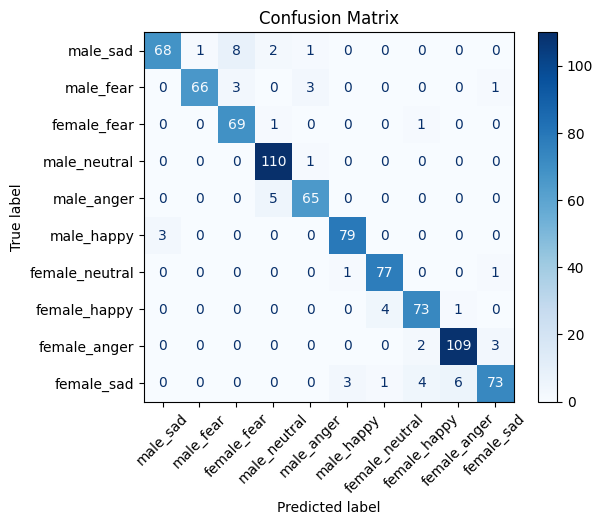

In [101]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

unique_labels = data['Emotions'].unique()
cm = confusion_matrix(y_test, predicted_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_labels)
disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.show()

In [87]:
from sklearn import svm

model=svm.SVC()
model.fit(X_reshaped,y_train)

SVC()

In [88]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test_reshaped)
print(accuracy_score(y_test, y_pred))

0.5467455621301776


In [89]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[45  9  9  8  3  2  2  0  1  1]
 [ 5 35 14  8  4  2  2  2  0  1]
 [ 5 10 43  4  7  1  1  0  0  0]
 [ 5  1  4 92  6  0  0  0  3  0]
 [ 6  3  8 26 24  0  0  0  2  1]
 [ 9  8  6  2  0 34  3 10  8  2]
 [ 2  4  6  3  2  3 40  7 12  0]
 [ 0  5  7  2  1  1  3 45 12  2]
 [ 4  1  4  5  1  0  3  7 83  6]
 [ 2  1  1  7  2  1  9  7 36 21]]
